# Set Directory Path

In [4]:
import os
import torch
from pathlib import Path
p = Path.cwd().resolve()
while p != p.parent and not (p / 'requirements.txt').exists() and not (p / 'data').exists():
    p = p.parent

os.chdir(str(p/"src"))

# Plotting Loss and Accuracies

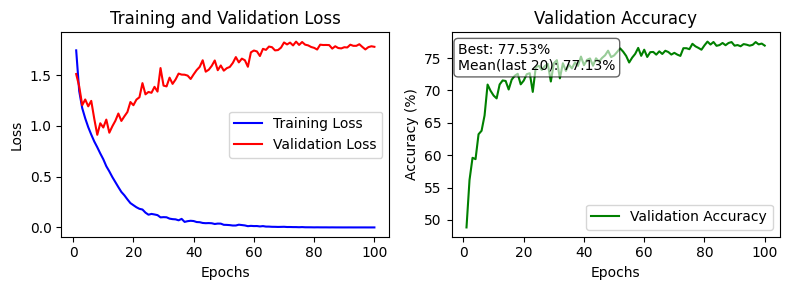

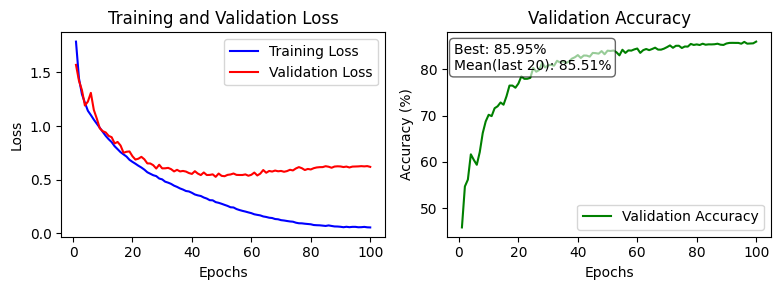

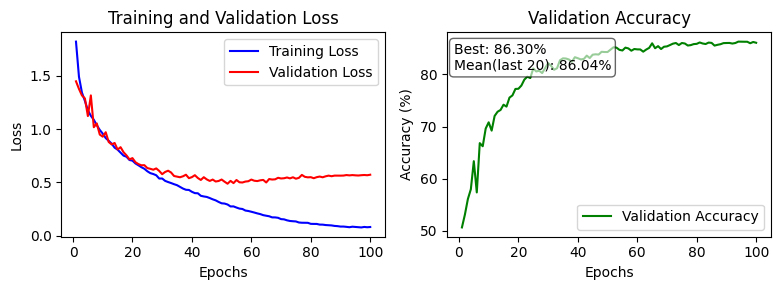

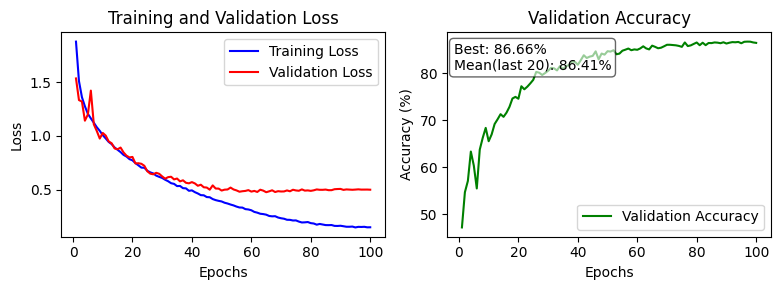

In [2]:
from utils import plot_from_csv

plot_from_csv(source='../experiments/logs/avg_training_log_Tier0.csv', dest='../plots/aug_tier_0.png')
plot_from_csv(source='../experiments/logs/avg_training_log_Tier1.csv', dest='../plots/aug_tier_1.png')
plot_from_csv(source='../experiments/logs/avg_training_log_Tier2.csv', dest='../plots/aug_tier_2.png')
plot_from_csv(source='../experiments/logs/avg_training_log_Tier3.csv', dest='../plots/aug_tier_3.png')



# Calculate class Accuracies

In [ ]:
from eval import evaluateClassAccuracy
from model import build_model
from data import build_dataloaders

# build dataloaders (match augmentation tier & size that was used for training)
p = Path.cwd().resolve().parent  # adjust as needed
train_loader, val_loader, test_loader, meta = build_dataloaders(data_root=str(p/'data'), size=128, batch_size=64, augmentationTier=0, seed=67)


for i in range(4):
    print(f"Final Evaluation on Test Set (Tier{i}):")
    ckpt_path = f"../experiments/checkpoints/model_epoch_best_Tier{i}.pth"
    model = build_model(name="mobilenet_v2", num_classes=len(meta["class_names"]))
    checkpoint = torch.load(ckpt_path, map_location="cpu")
    model.load_state_dict(checkpoint["model_state_dict"])
    model.eval()
    evaluateClassAccuracy(model, test_loader, torch.nn.CrossEntropyLoss())

# Plot different augmentations

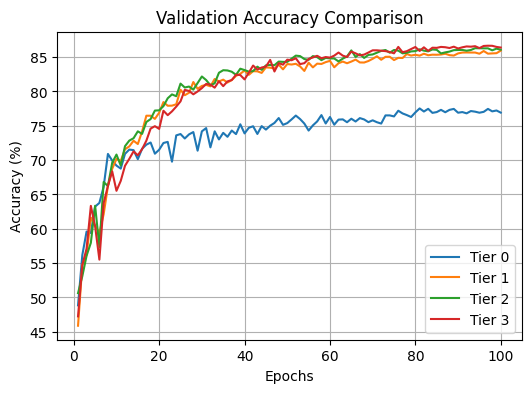

In [2]:
aug0 = '../experiments/logs/avg_training_log_Tier0.csv'
aug1 = '../experiments/logs/avg_training_log_Tier1.csv'
aug2 = '../experiments/logs/avg_training_log_Tier2.csv'
aug3 = '../experiments/logs/avg_training_log_Tier3.csv'

from utils import compare_plots

compare_plots([aug0, aug1, aug2, aug3], labels=['Tier 0', 'Tier 1', 'Tier 2', 'Tier 3'], dest='../plots/aug_tiers_comparison.png')

# Accuracy for each model on test set

In [6]:
from utils import seed_everything
from eval import evaluate
from model import build_model
from data import build_dataloaders

criterion = torch.nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def evalShort(augTier, seed, test_loader, meta):
    print(f"Final Evaluation on Test Set (Tier{augTier}, Seed {seed}):")
    ckpt_path = f"../experiments/checkpoints/seed{seed}/model_epoch_last_Tier{augTier}.pth"
    model = build_model(name="mobilenet_v2", num_classes=len(meta["class_names"]))
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model_state_dict"])
    evaluate(model, test_loader, criterion)

for seed in [66, 67, 68]:
    print(f"\n=== Evaluations for Seed {seed} ===")
    seed_everything(seed)
    _tl, _vl, test_loader, meta = build_dataloaders(data_root=str(p/'data'), size=128, batch_size=64, seed=seed, num_workers=0)
    for tier in range(4):
        evalShort(tier, seed, test_loader, meta)


=== Evaluations for Seed 66 ===
Discovered 21710 samples in 10 classes.
Augmentation Tier 0 - Train/val/test split: 17380/2165/2165
Final Evaluation on Test Set (Tier0, Seed 66):
Average Loss: 1.8244, Accuracy: 75.98%
Final Evaluation on Test Set (Tier1, Seed 66):
Average Loss: 0.5840, Accuracy: 86.28%
Final Evaluation on Test Set (Tier2, Seed 66):
Average Loss: 0.5368, Accuracy: 87.39%
Final Evaluation on Test Set (Tier3, Seed 66):
Average Loss: 0.4767, Accuracy: 87.02%

=== Evaluations for Seed 67 ===
Discovered 21710 samples in 10 classes.
Augmentation Tier 0 - Train/val/test split: 17380/2165/2165
Final Evaluation on Test Set (Tier0, Seed 67):
Average Loss: 1.9590, Accuracy: 75.70%
Final Evaluation on Test Set (Tier1, Seed 67):
Average Loss: 0.6585, Accuracy: 84.43%
Final Evaluation on Test Set (Tier2, Seed 67):
Average Loss: 0.5861, Accuracy: 85.77%
Final Evaluation on Test Set (Tier3, Seed 67):
Average Loss: 0.5481, Accuracy: 85.59%

=== Evaluations for Seed 68 ===
Discovered 21